# Phase 2 Milestone 1

### Muhammad Galang Al-Hakim

### HCK-004

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#untuk model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
%matplotlib inline
import tensorflow as tf
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import regularizers
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 21.3 MB/s eta 0:00:00


# Data Loading

In [2]:
df = pd.read_csv('/content/churn.txt')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


### Dataset Description

- **user_id** = ID of a customer
- **age** = Age of a customer
- **gender** = Gender of a customer
- **region_category** = Region that a customer belongs to
- **membership_category** = Category of the membership that a customer is using
- **joining_date** = Date when a customer became a member
- **joined_through referral**	= Whether a customer joined using any referral code or ID
- **preferred_offer types** = Type of offer that a customer prefers
- **medium_of operation** = Medium of operation that a customer uses for transactions
- **internet_option** = Type of internet service a customer uses
- **last_visit_time** = The last time a customer visited the website
- **days_since_last_login** = Number of days since a customer last logged into the website
- **avg_time_spent** = Average time spent by a customer on the website
- **avg_transaction_value** = Average transaction value of a customer
- **avg_frequency_login_days** = Number of times a customer has logged in to the website
- **points_in_wallet** = Points awarded to a customer on each transaction
- **used_special_discount** = Whether a customer uses special discounts offered
- **offer_application_preference**	=  Whether a customer prefers offers
- **past_complaint** = Whether a customer has raised any complaints
- **complaint_status** = Whether the complaints raised by a customer was resolved
- **feedback** = Feedback provided by a customer
- **churn_risk_score** = Churn score 0 : Not churn, 1 : Churn

In [3]:
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


# Exploration Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [7]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37005    False
37006    False
37007    False
37008    False
37009    False
Length: 37010, dtype: bool

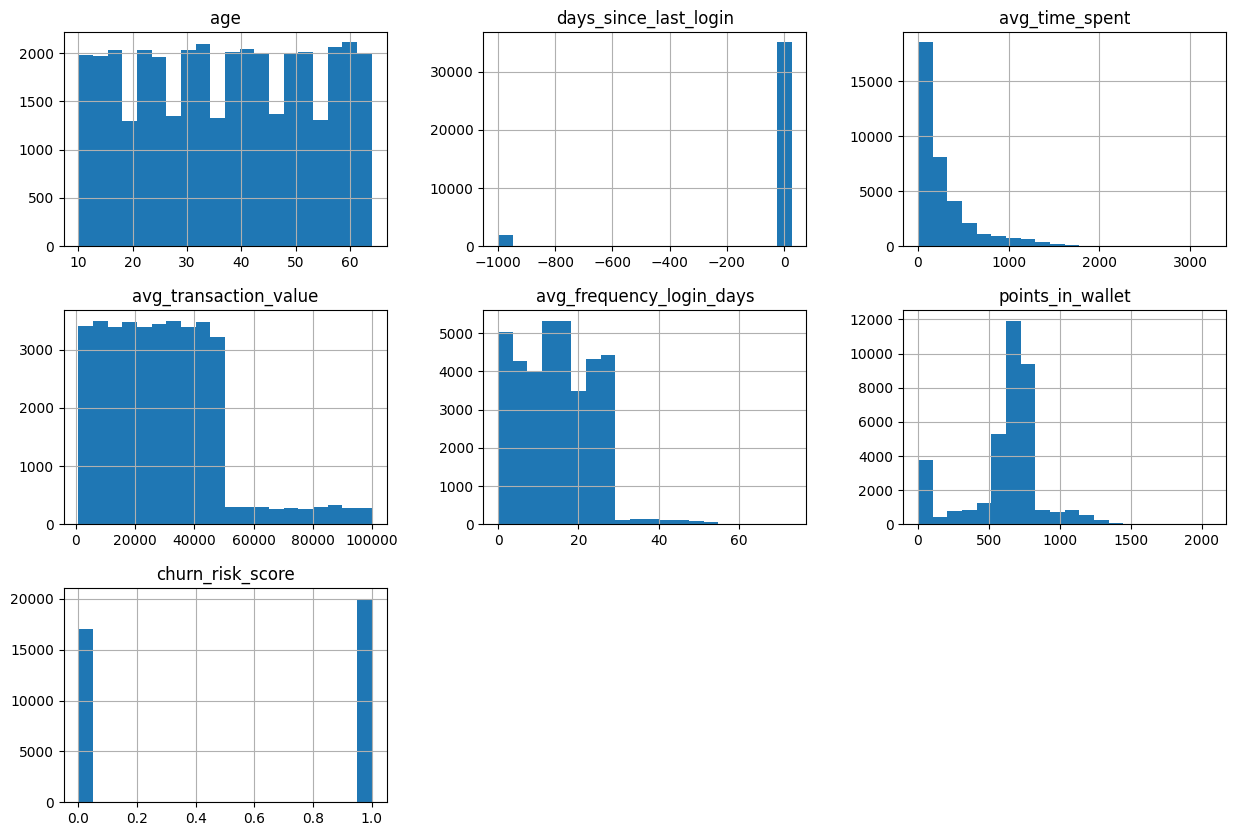

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [10]:
for column in df.columns:
    print(f"Number of unique values in {column}: {df[column].nunique()}")

Number of unique values in user_id: 36992
Number of unique values in age: 55
Number of unique values in gender: 2
Number of unique values in region_category: 3
Number of unique values in membership_category: 6
Number of unique values in joining_date: 1096
Number of unique values in joined_through_referral: 2
Number of unique values in preferred_offer_types: 3
Number of unique values in medium_of_operation: 3
Number of unique values in internet_option: 3
Number of unique values in last_visit_time: 30101
Number of unique values in days_since_last_login: 27
Number of unique values in avg_time_spent: 24243
Number of unique values in avg_transaction_value: 36894
Number of unique values in avg_frequency_login_days: 971
Number of unique values in points_in_wallet: 23564
Number of unique values in used_special_discount: 2
Number of unique values in offer_application_preference: 2
Number of unique values in past_complaint: 2
Number of unique values in complaint_status: 5
Number of unique values

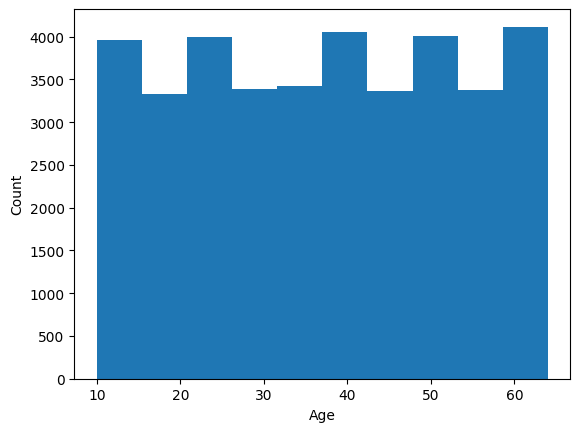

In [11]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

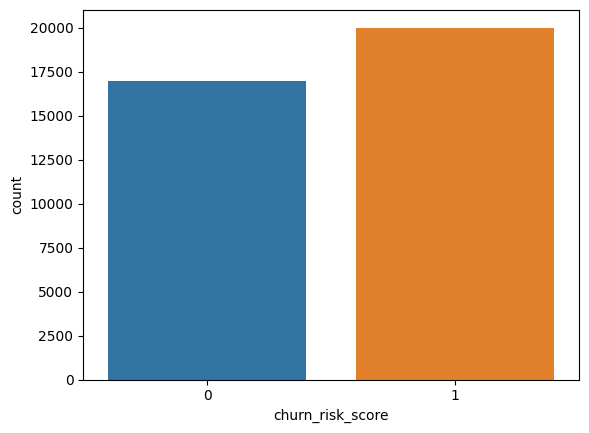

In [12]:
sns.countplot(data=df, x='churn_risk_score')
plt.show()

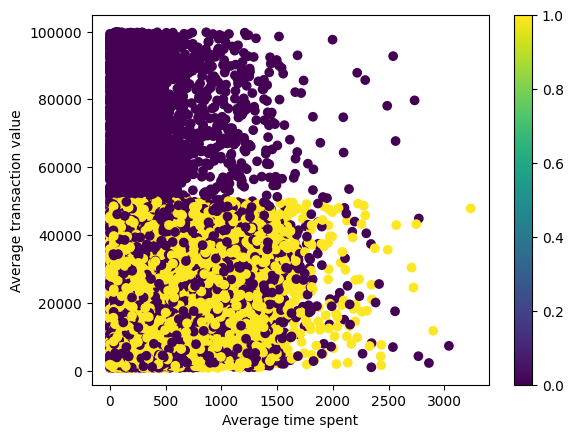

In [13]:
plt.scatter(df['avg_time_spent'], df['avg_transaction_value'], c=df['churn_risk_score'])
plt.xlabel('Average time spent')
plt.ylabel('Average transaction value')
plt.colorbar()
plt.show()

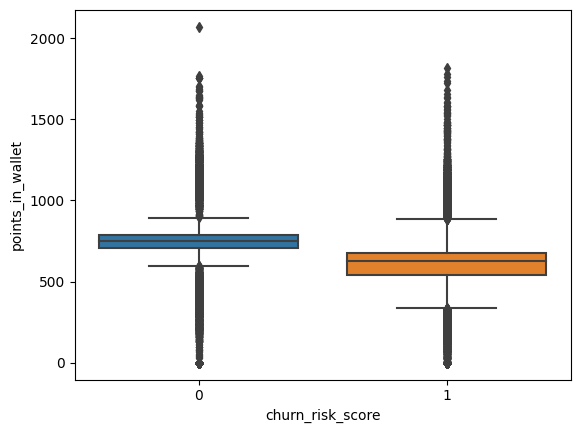

In [14]:
sns.boxplot(data=df, x='churn_risk_score', y='points_in_wallet')
plt.show()

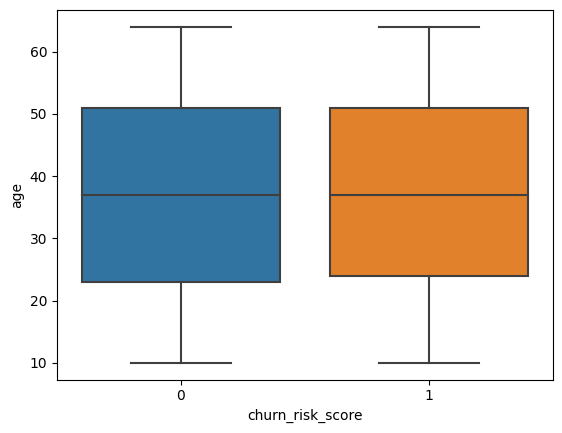

In [15]:
sns.boxplot(data=df, x='churn_risk_score', y='age')
plt.show()

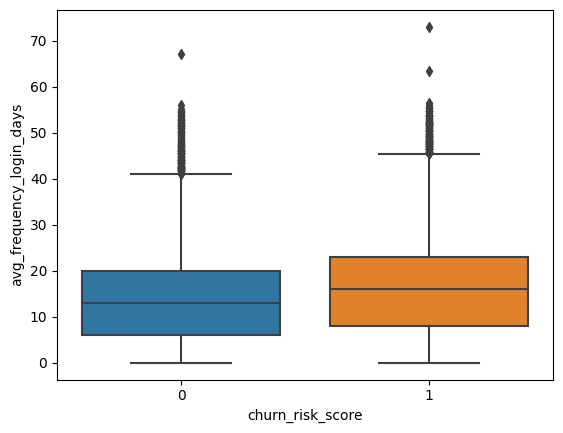

In [16]:
sns.boxplot(data=df, x='churn_risk_score', y='avg_frequency_login_days')
plt.show()

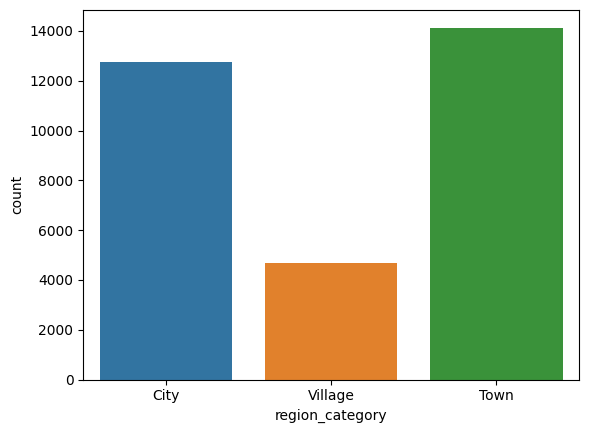

In [17]:
sns.countplot(data=df, x='region_category')
plt.show()

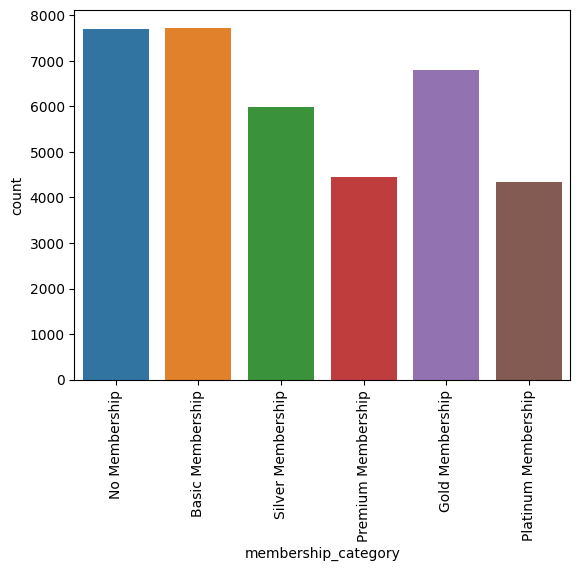

In [18]:
sns.countplot(data=df, x='membership_category')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [19]:
num_col = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days']
cat_col_ohe = ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']
cat_col_ord = ['gender','membership_category','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

In [20]:
fitur= df.drop('churn_risk_score',axis=1)
target= df['churn_risk_score']

In [21]:
x_train_full, x_test, y_train_full, y_test= train_test_split(
    fitur, target, test_size= 0.2, stratify=target)

In [22]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(fitur,
                                                                target,
                                                                shuffle=True, test_size=0.2,
                                                                stratify= target
                                                                )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                   y_train_full,
                                                   shuffle=True, test_size=0.2, stratify= y_train_full)

In [23]:
x_train.skew()

<ipython-input-23-6ed0439853c6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_train.skew()


age                        -0.011076
days_since_last_login      -3.905337
avg_time_spent              2.275818
avg_transaction_value       1.009470
avg_frequency_login_days    0.389506
points_in_wallet           -0.776277
dtype: float64

In [24]:
num_transformer = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])
num_ss = num_transformer.fit_transform(x_train[['age','avg_frequency_login_days']])

In [25]:
num_transformer2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])
num_mm = num_transformer2.fit_transform(x_train[['points_in_wallet']])

In [26]:
num_transformer3 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])
num_mm2 = num_transformer3.fit_transform(x_train[['avg_time_spent','avg_transaction_value', 'days_since_last_login']])

In [27]:
cat_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ord_enc', OrdinalEncoder(categories=[['M', 'F'], ['No Membership', 'Basic Membership', 'Silver Membership', 'Premium Membership', 'Gold Membership', 'Platinum Membership'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]))
])

In [28]:
cat_transformer2= Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))
])

In [29]:
full_pipeline = ColumnTransformer([
        ("num1", num_transformer, ['age','avg_frequency_login_days']),
        ("num2", num_transformer2, ['points_in_wallet']),
        ("num3", num_transformer3, ['avg_time_spent','avg_transaction_value', 'days_since_last_login']),
        ("cat_ord", cat_transformer, ['gender', 'membership_category','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']),
        ("cat_ohe", cat_transformer2, ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']),
    ])

In [30]:
X_train= full_pipeline.fit_transform(x_train_full)
X_test= full_pipeline.transform(x_test)
X_val = full_pipeline.transform(x_val)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Definition

In [31]:
X_train.shape[1:]

(38,)

In [32]:
X_train

array([[-0.13330565,  0.36653782,  0.65061453, ...,  0.        ,
         1.        ,  0.        ],
       [-0.19628898, -1.56694376,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30757769, -1.56694376,  0.64938683, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.55951103, -0.70761862,  0.60875007, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74846103, -1.35211248,  0.72423542, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51120565,  0.79620039,  0.4590529 , ...,  0.        ,
         0.        ,  0.        ]])

# Model Training

In [33]:
ann = Sequential()
# ann.add(tf.keras.Input(shape=(X_train.shape[1:])))
ann.add(Dense(units=30, activation='relu',input_shape=(X_train.shape[1:])))
ann.add(Dense(units=1,activation='sigmoid')) #sesuaikan dengan target atau jumlah class

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [35]:
hidden1 = ann.layers[1]
hidden1.name

'dense_1'

In [36]:
weights, biases = hidden1.get_weights()
# weights

In [37]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1170      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


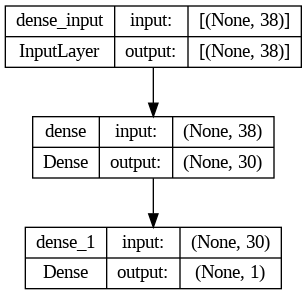

In [38]:
tf.keras.utils.plot_model(ann, show_shapes=True)

In [39]:
X_train.shape

(29608, 38)

# Model Sequential

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam
                metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train_full, epochs=50, verbose=1, batch_size=32, validation_data=(X_val,y_val)) # fit for 50 passes of the data

Epoch 1/50
926/926 [==============================] - 14s 8ms/step - loss: 1.1252 - accuracy: 0.7835 - val_loss: 0.5377 - val_accuracy: 0.8097
Epoch 2/50
926/926 [==============================] - 6s 6ms/step - loss: 3.6790 - accuracy: 0.6682 - val_loss: 3.3192 - val_accuracy: 0.6493
Epoch 3/50
926/926 [==============================] - 7s 8ms/step - loss: 3.5260 - accuracy: 0.6681 - val_loss: 2.7543 - val_accuracy: 0.7139
Epoch 4/50
926/926 [==============================] - 6s 7ms/step - loss: 2.3997 - accuracy: 0.7275 - val_loss: 1.5489 - val_accuracy: 0.7671
Epoch 5/50
926/926 [==============================] - 5s 6ms/step - loss: 1.2599 - accuracy: 0.7505 - val_loss: 0.6042 - val_accuracy: 0.7854
Epoch 6/50
926/926 [==============================] - 3s 3ms/step - loss: 0.4300 - accuracy: 0.8141 - val_loss: 0.3990 - val_accuracy: 0.8170
Epoch 7/50
926/926 [==============================] - 4s 4ms/step - loss: 0.4490 - accuracy: 0.7885 - val_loss: 0.4048 - val_accuracy: 0.8050
Epoch

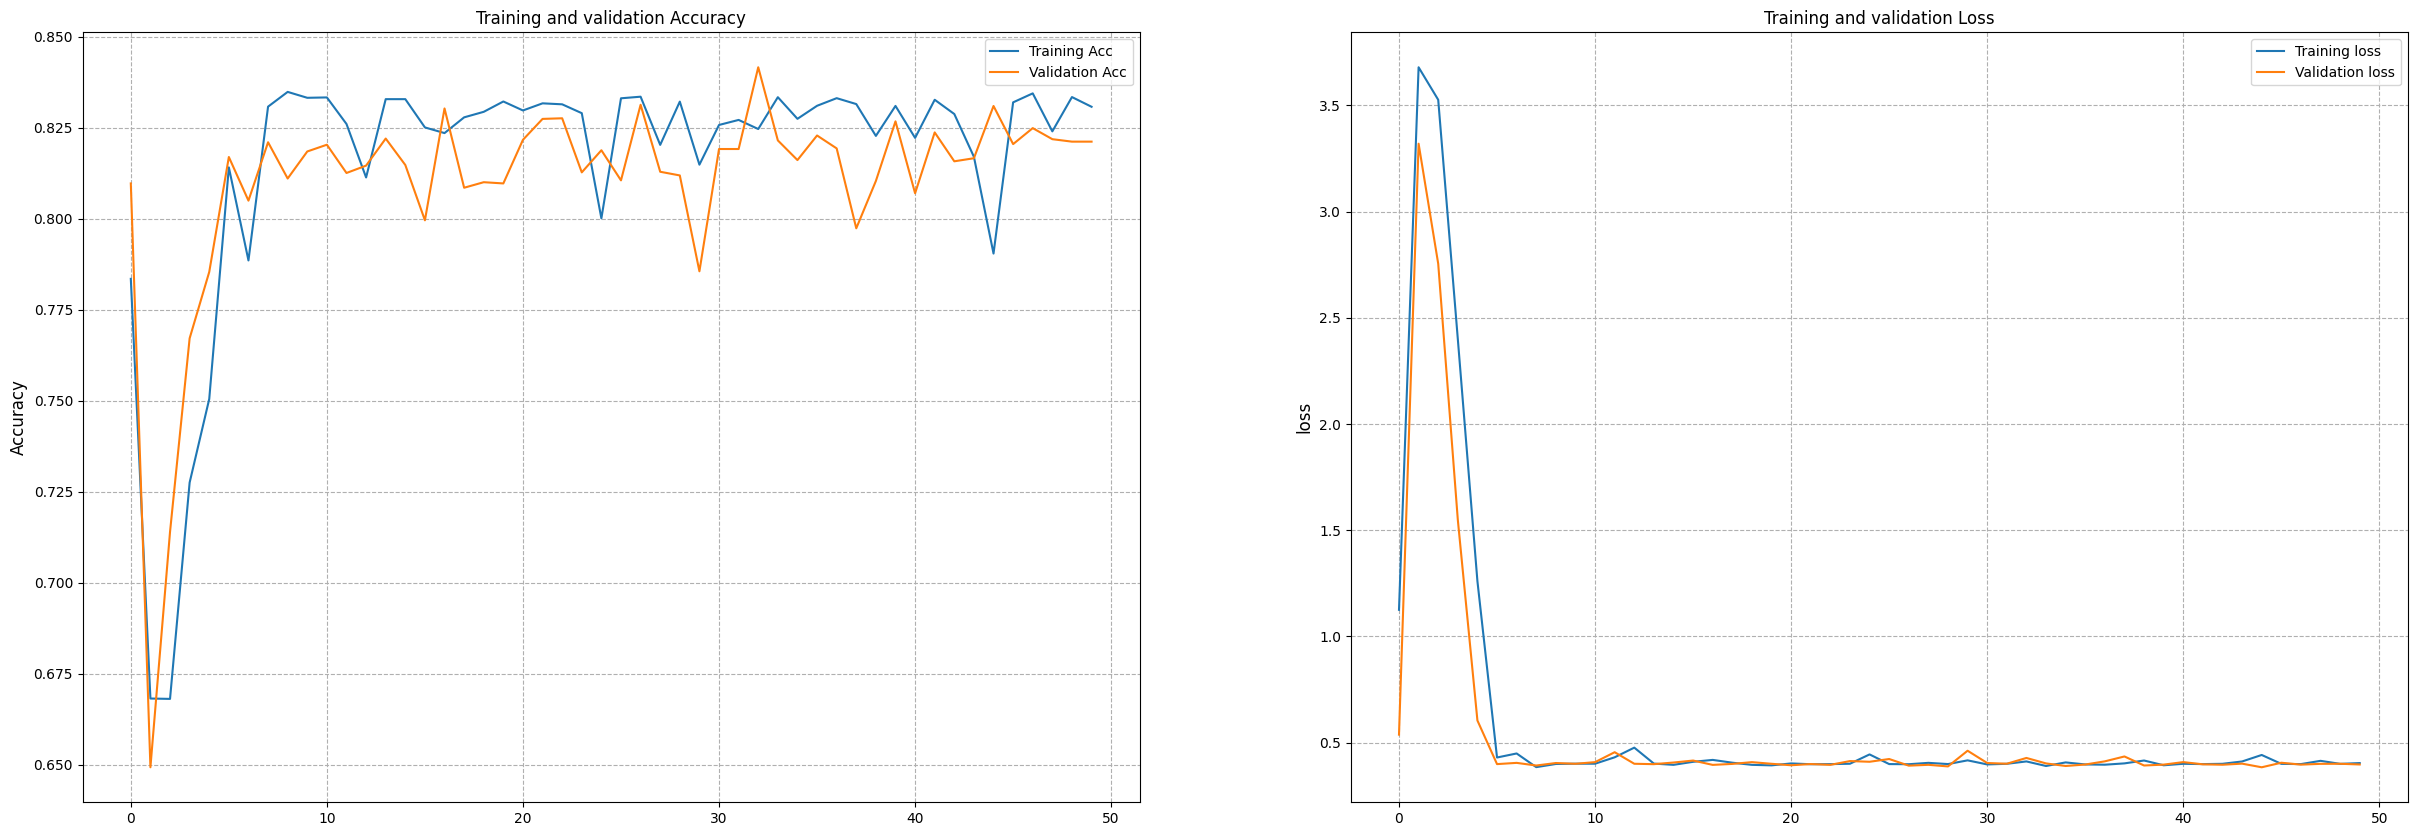

In [41]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adamax(learning_rate= 0.01), # use AdaMax
                metrics=['accuracy'])

# 3. Fit the model
history = model_2.fit (X_train, y_train_full, epochs=50, verbose=1, batch_size=32, validation_data=(X_val,y_val)) # fit for 50 passes of the data

Epoch 1/50
926/926 [==============================] - 5s 4ms/step - loss: 1.6251 - accuracy: 0.8432 - val_loss: 1.3992 - val_accuracy: 0.8457
Epoch 2/50
926/926 [==============================] - 4s 4ms/step - loss: 1.3390 - accuracy: 0.8532 - val_loss: 1.3903 - val_accuracy: 0.8477
Epoch 3/50
926/926 [==============================] - 3s 3ms/step - loss: 1.3429 - accuracy: 0.8500 - val_loss: 1.3042 - val_accuracy: 0.8357
Epoch 4/50
926/926 [==============================] - 3s 3ms/step - loss: 0.5374 - accuracy: 0.8173 - val_loss: 0.4025 - val_accuracy: 0.8195
Epoch 5/50
926/926 [==============================] - 3s 4ms/step - loss: 0.4085 - accuracy: 0.8273 - val_loss: 0.4187 - val_accuracy: 0.8281
Epoch 6/50
926/926 [==============================] - 3s 4ms/step - loss: 0.4041 - accuracy: 0.8296 - val_loss: 0.4030 - val_accuracy: 0.8210
Epoch 7/50
926/926 [==============================] - 3s 3ms/step - loss: 0.4017 - accuracy: 0.8269 - val_loss: 0.4084 - val_accuracy: 0.7874
Epoch 

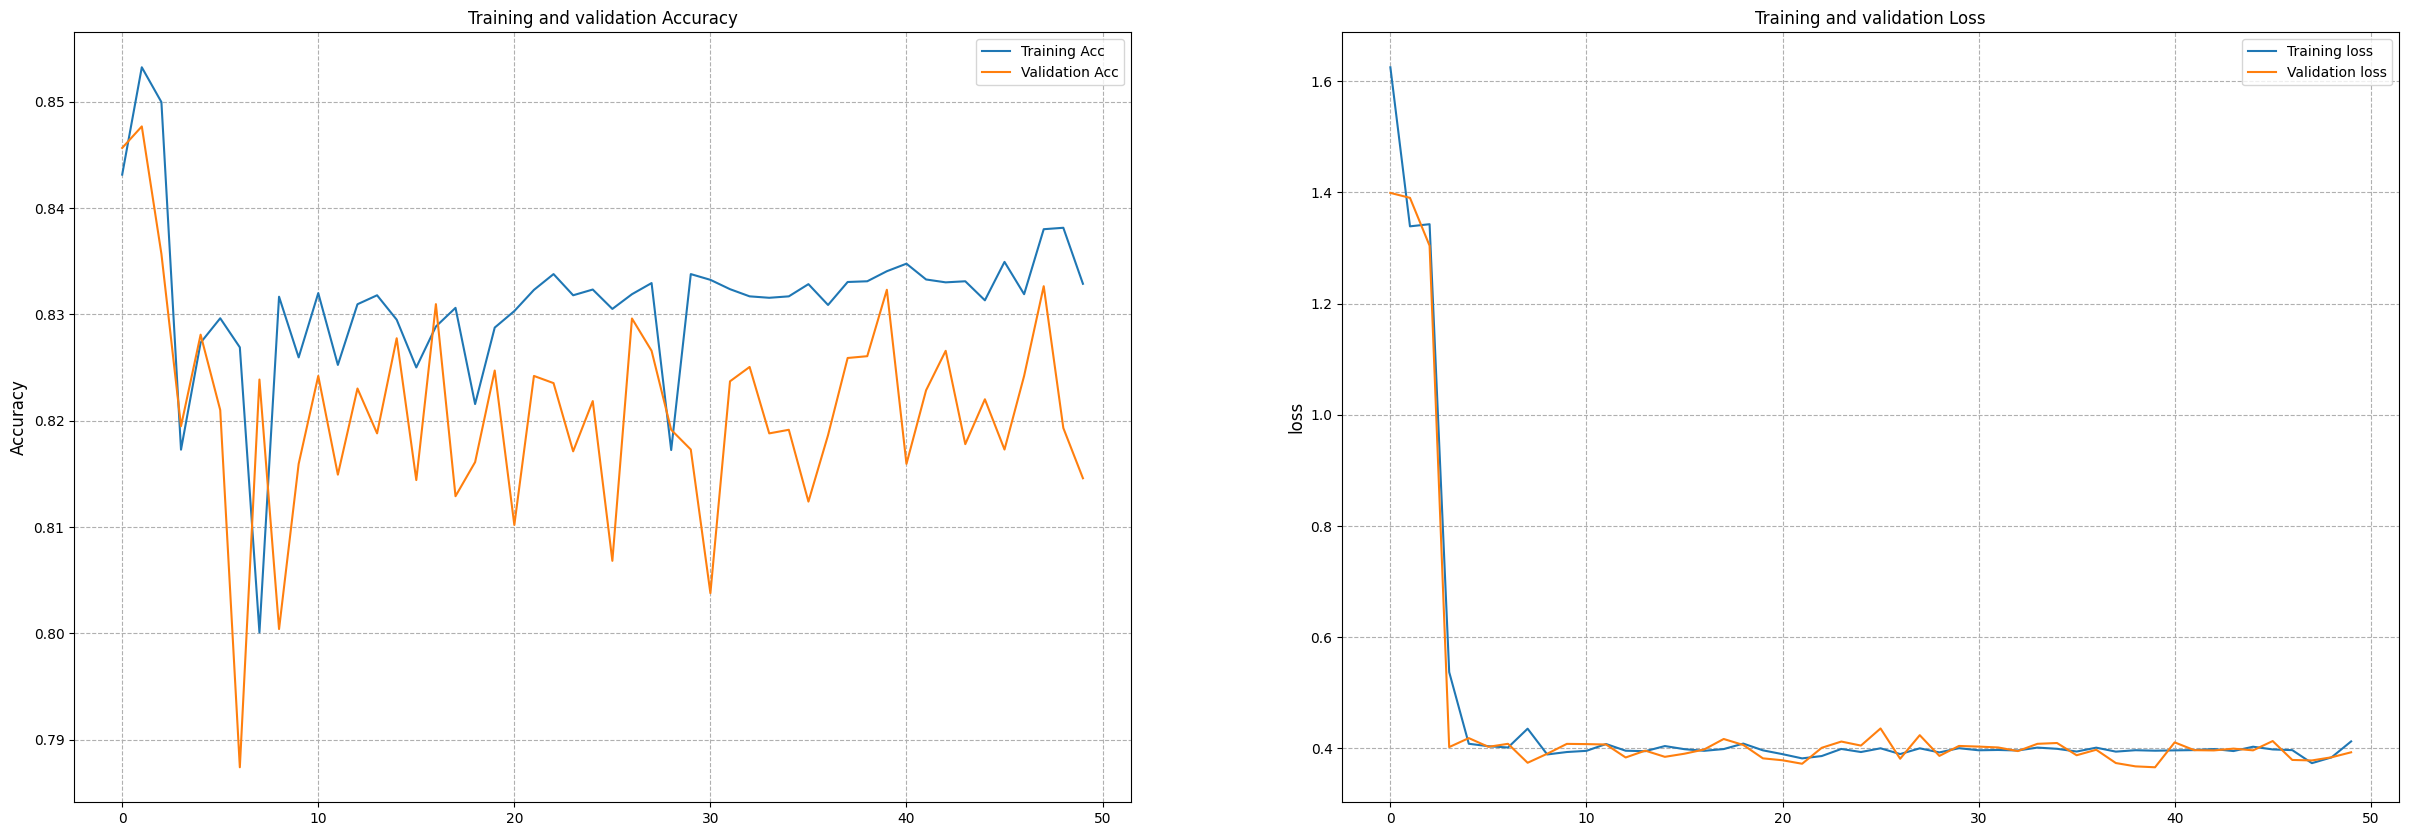

In [43]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

# Model Sequential Improvement

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='elu'), # add 100 dense neurons
  tf.keras.layers.Dense(50, activation='elu'),
  tf.keras.layers.Dense(10, activation='elu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Nadam(learning_rate= 0.01), # use Nadam
                metrics=['accuracy'])

# 3. Fit the model
history = model3.fit(X_train, y_train_full, epochs=50, verbose=1, batch_size=32, validation_data=(X_val,y_val)) # fit for 100 passes of the data

Epoch 1/50
926/926 [==============================] - 6s 4ms/step - loss: 0.3291 - accuracy: 0.8501 - val_loss: 0.3268 - val_accuracy: 0.8441
Epoch 2/50
926/926 [==============================] - 4s 5ms/step - loss: 0.2777 - accuracy: 0.8503 - val_loss: 0.2692 - val_accuracy: 0.8484
Epoch 3/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2640 - accuracy: 0.8525 - val_loss: 0.2639 - val_accuracy: 0.8473
Epoch 4/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.8551 - val_loss: 0.2619 - val_accuracy: 0.8512
Epoch 5/50
926/926 [==============================] - 4s 5ms/step - loss: 0.2582 - accuracy: 0.8604 - val_loss: 0.2633 - val_accuracy: 0.8598
Epoch 6/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2535 - accuracy: 0.8684 - val_loss: 0.2588 - val_accuracy: 0.8663
Epoch 7/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2553 - accuracy: 0.8801 - val_loss: 0.2894 - val_accuracy: 0.8674
Epoch 

# Model Evaluatiuon

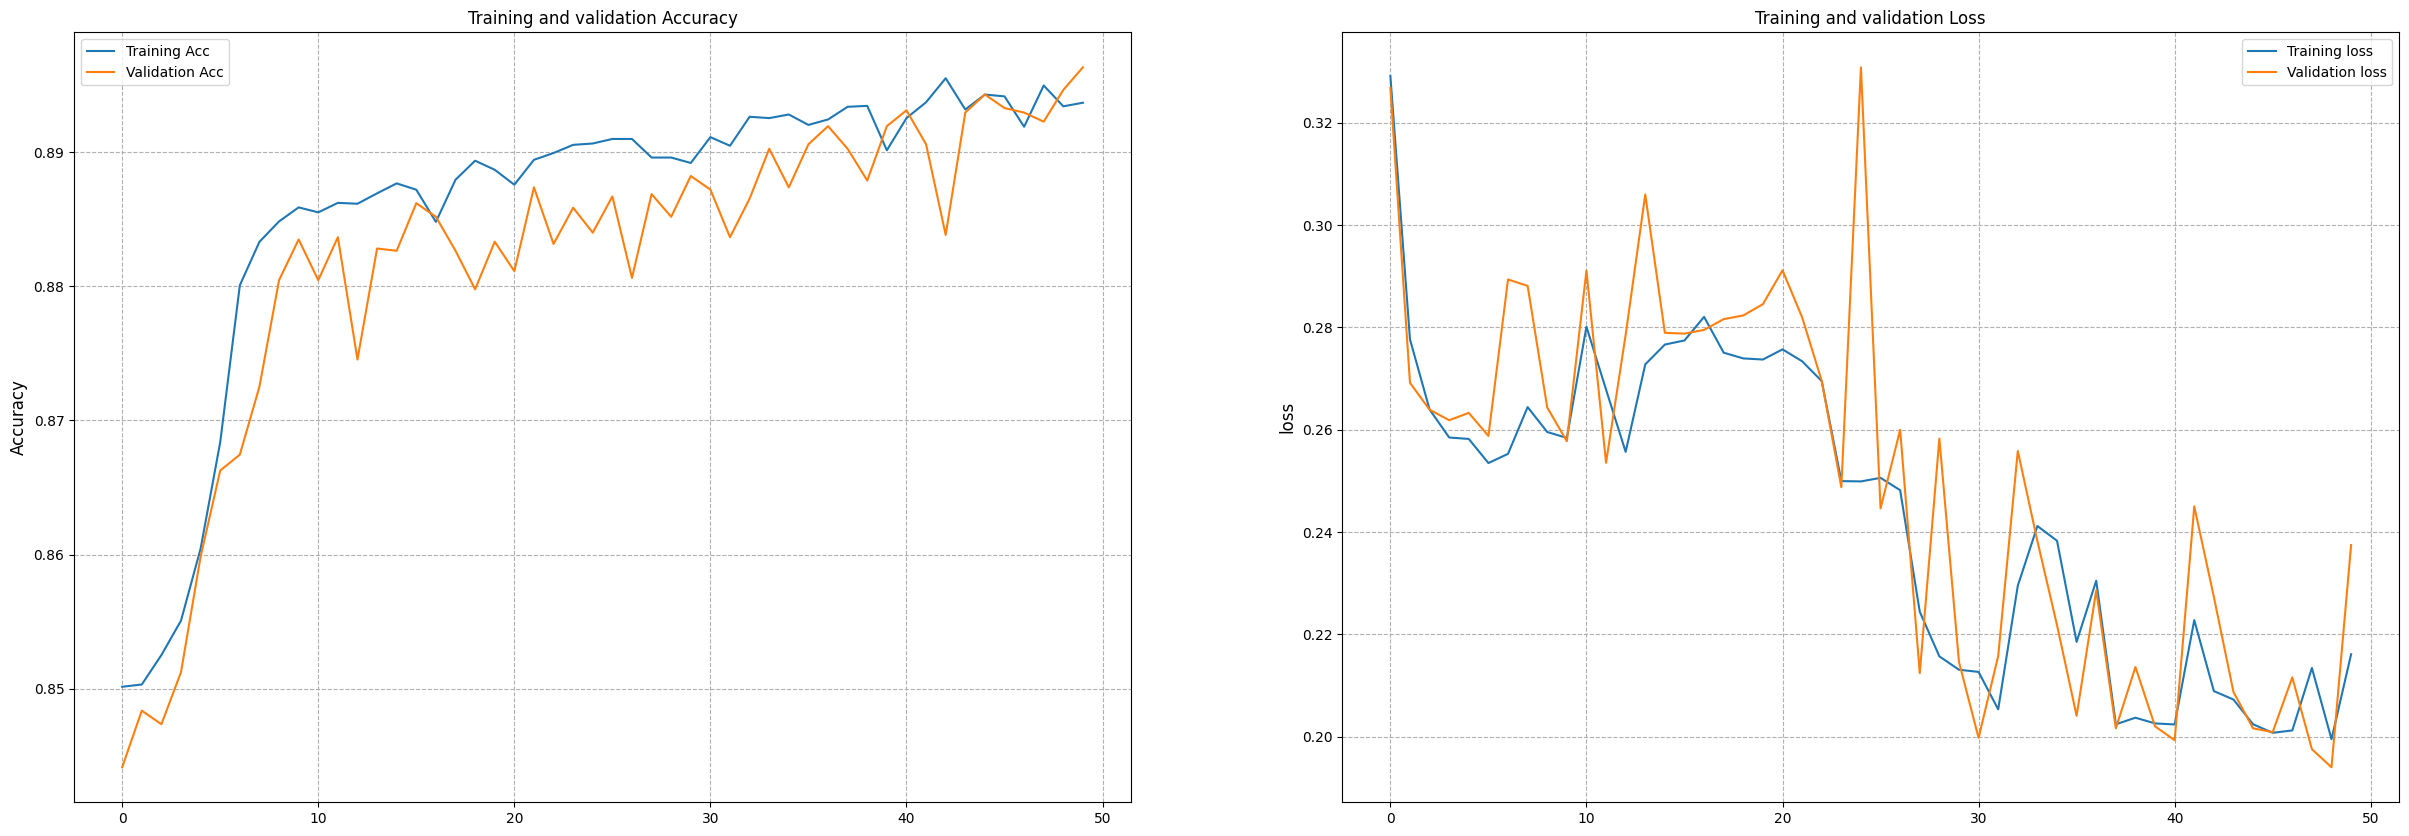

In [45]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

# Model Functional API

In [46]:
# functional API
input_layer= tf.keras.Input(shape=(X_train.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

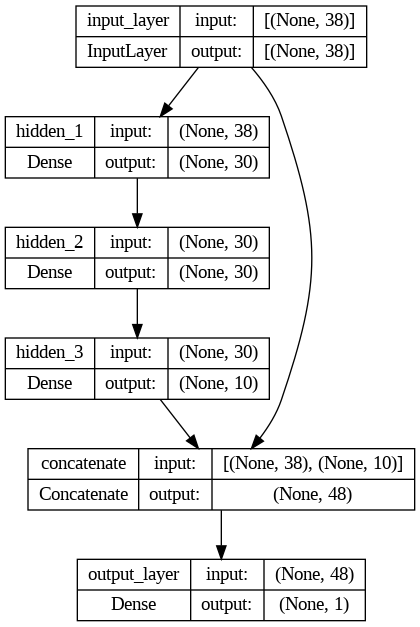

In [47]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [48]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # add 100 dense neurons
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Nadam(learning_rate= 0.01), # use Nadam
                metrics=['accuracy'])

# 3. Fit the model
history = model4.fit(X_train, y_train_full, epochs=50, verbose=1, batch_size=32, validation_data=(X_val,y_val)) # fit for 50 passes of the data

Epoch 1/50
926/926 [==============================] - 6s 5ms/step - loss: 0.3315 - accuracy: 0.8496 - val_loss: 0.3188 - val_accuracy: 0.8477
Epoch 2/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2901 - accuracy: 0.8510 - val_loss: 0.2763 - val_accuracy: 0.8445
Epoch 3/50
926/926 [==============================] - 5s 5ms/step - loss: 0.2617 - accuracy: 0.8489 - val_loss: 0.2649 - val_accuracy: 0.8445
Epoch 4/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2607 - accuracy: 0.8486 - val_loss: 0.2691 - val_accuracy: 0.8445
Epoch 5/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2576 - accuracy: 0.8499 - val_loss: 0.2637 - val_accuracy: 0.8445
Epoch 6/50
926/926 [==============================] - 4s 5ms/step - loss: 0.2587 - accuracy: 0.8496 - val_loss: 0.2627 - val_accuracy: 0.8446
Epoch 7/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2807 - accuracy: 0.8502 - val_loss: 0.3014 - val_accuracy: 0.8467
Epoch 

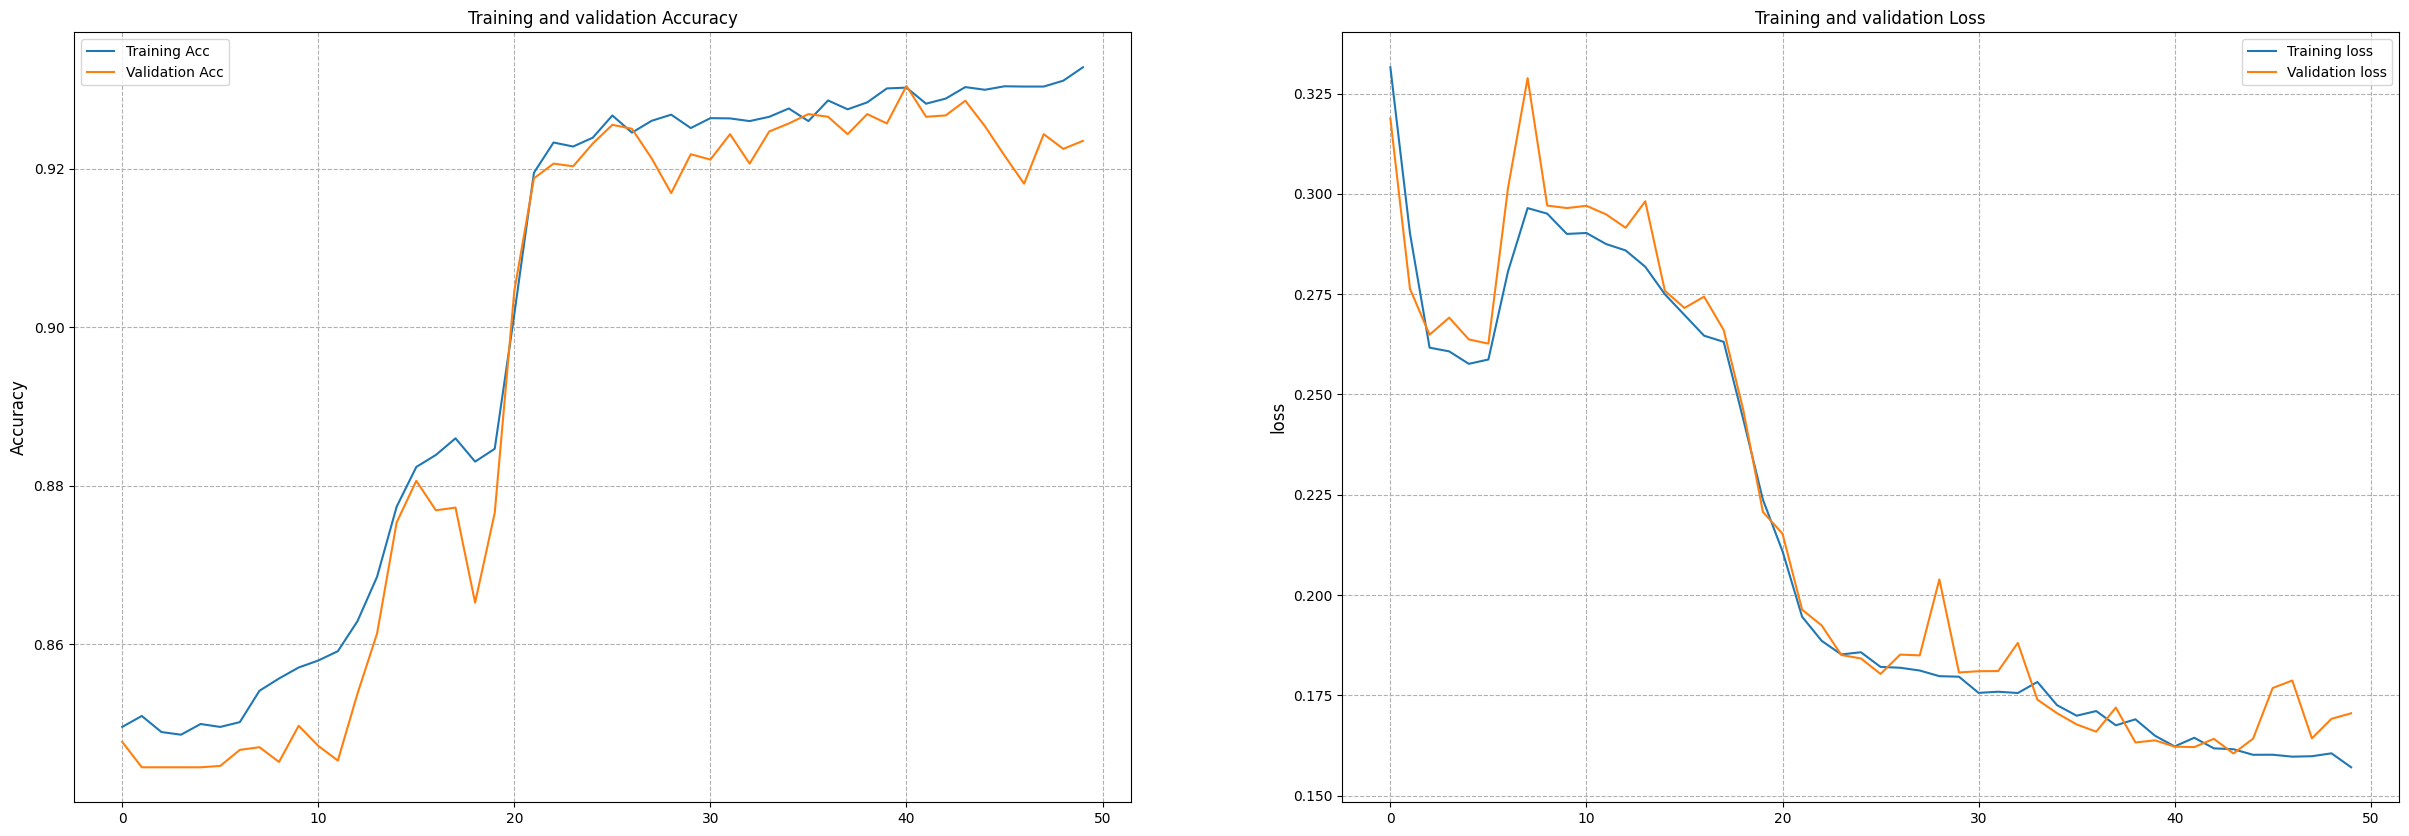

In [50]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # add 100 dense neurons
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01), # use Nadam
                metrics=['accuracy'])

# 3. Fit the model
history = model5.fit(X_train, y_train_full, epochs=50, verbose=1, batch_size=32, validation_data=(X_val,y_val)) # fit for 50 passes of the data

Epoch 1/50
926/926 [==============================] - 5s 4ms/step - loss: 0.3359 - accuracy: 0.8491 - val_loss: 0.3205 - val_accuracy: 0.8489
Epoch 2/50
926/926 [==============================] - 3s 4ms/step - loss: 0.2980 - accuracy: 0.8545 - val_loss: 0.2752 - val_accuracy: 0.8558
Epoch 3/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2611 - accuracy: 0.8624 - val_loss: 0.2578 - val_accuracy: 0.8754
Epoch 4/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2507 - accuracy: 0.8827 - val_loss: 0.2587 - val_accuracy: 0.8918
Epoch 5/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2301 - accuracy: 0.9035 - val_loss: 0.2171 - val_accuracy: 0.9122
Epoch 6/50
926/926 [==============================] - 3s 4ms/step - loss: 0.2180 - accuracy: 0.9102 - val_loss: 0.2069 - val_accuracy: 0.9119
Epoch 7/50
926/926 [==============================] - 4s 4ms/step - loss: 0.2025 - accuracy: 0.9179 - val_loss: 0.1979 - val_accuracy: 0.9206
Epoch 

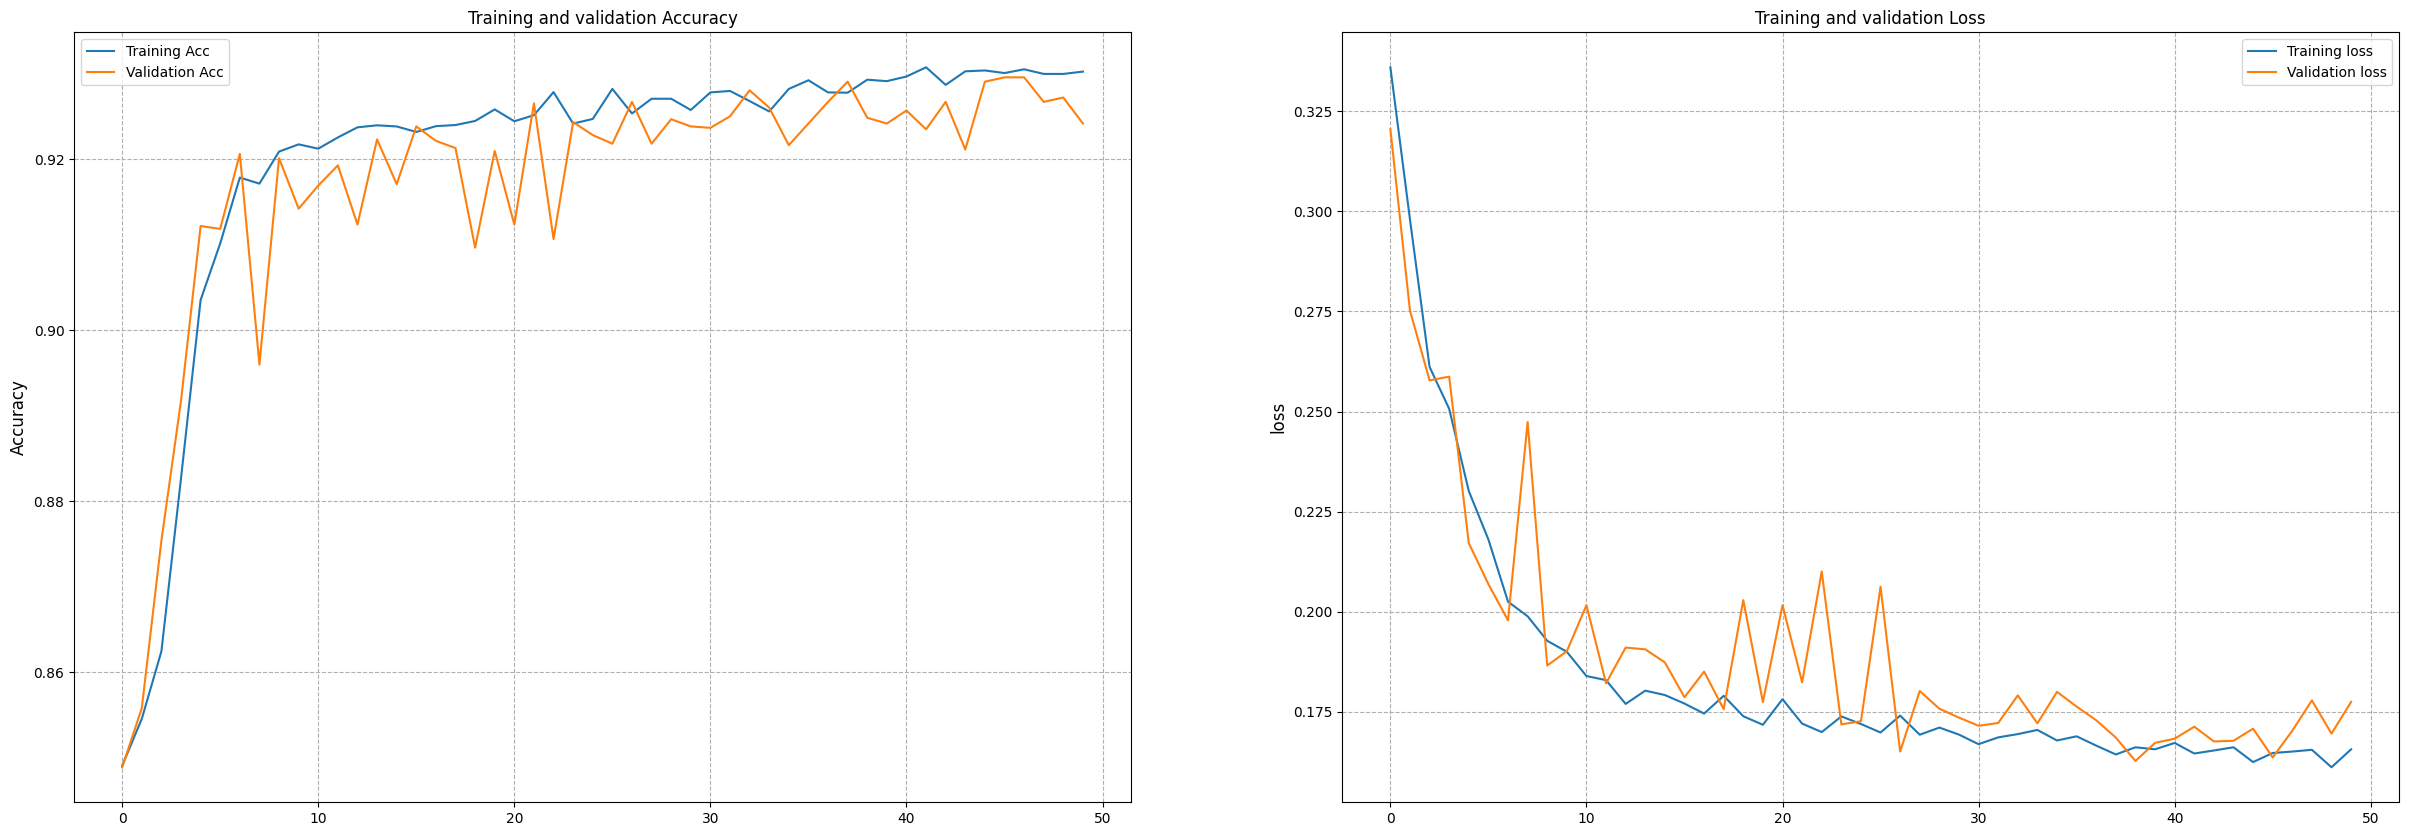

In [52]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

# Model Saving

In [53]:
pickle.dump(full_pipeline, open('.pkl', 'wb'))

# save model
model4.save('best_model.h5')